Regression

The California Housing dataset is a popular dataset for machine learning, particularly for regression tasks. This dataset is significantly larger and more complex than simpler datasets like the Boston Housing dataset, making it suitable for more advanced regression models and techniques. Here's a brief description of its characteristics:
1. Origin: The dataset was derived from the 1990 U.S. census data.
2. Purpose: It is commonly used to predict median house values in Californian districts, given several input features.
3. Features: The dataset contains 8 features (independent variables), which are:
   - MedInc: Median income in the block group.
   - HouseAge: Median house age in the block group.
   - AveRooms: Average number of rooms per household.
   - AveBedrms: Average number of bedrooms per household.
   - Population: Block group population.
   - AveOccup: Average number of household members.
   - Latitude: A block group’s latitude.
   - Longitude: A block group’s longitude.
4. Target Variable: The target variable is the median house value for California districts.
5. Data Points: It includes over 20,000 instances, making it a good dataset for more robust and complex regression models.
6. Applications: The dataset is widely used in predictive modeling and machine learning for real estate price prediction, spatial data analysis, and understanding housing market dynamics.
7. Preprocessing Needs: The dataset often requires preprocessing steps like feature scaling and handling missing values, although the standard version available in libraries like Scikit-Learn is usually clean and ready to use.
The California Housing dataset provides a more realistic and challenging dataset for regression analysis compared to simpler datasets, making it ideal for practicing more sophisticated data science techniques.


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

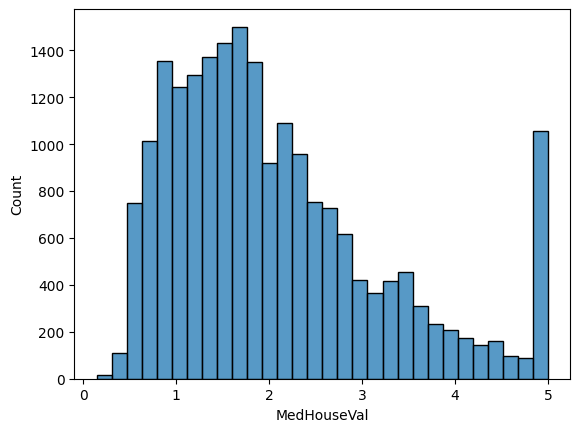

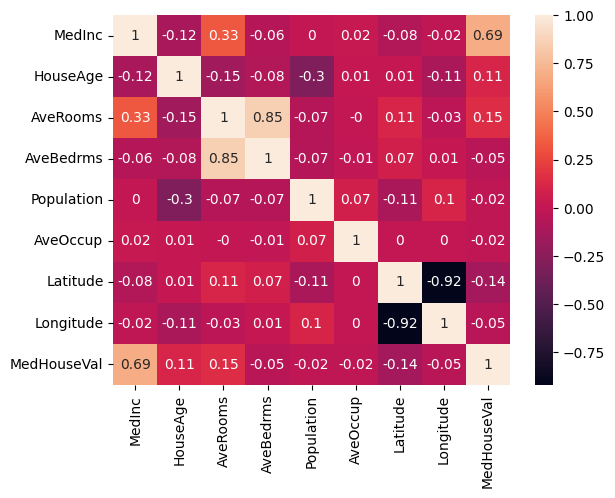

Mean Squared Error:  0.5558915986952442
R^2 Score:  0.575787706032451


In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load California housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# EDA - Exploratory Data Analysis
# Display the first few rows of the dataset
print(df.head())

# Generate summary statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of the target variable - Median House Value
sns.histplot(df['MedHouseVal'], bins=30)
plt.show()

# Create a correlation matrix to identify relationships between variables
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# Data Preprocessing
# Splitting the data into features and target variable
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Regression
# Create a linear regression model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)
